### MEME CLASSIFICATION PROJECT Project - Phase 1 - Multi Modal Neural Network

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from skimage.io import imread, imshow
from PIL import Image, ImageOps, ImageFile, ImageFilter
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random
import nltk
from nltk import word_tokenize
import torch 
import torch.nn as nn
from torch.nn import functional as F

#### Directing Paths to Folders

In [12]:
path = '/home/usman/Desktop/AI - Project - 2022/archive_150/memotion_dataset_7k/images'
glove_file = '/home/usman/Desktop/AI - Project - 2022/glove.6B/glove.6B.100d.txt'
label_xlsx_path = "/home/usman/Desktop/AI - Project - 2022/archive_150/memotion_dataset_7k/labels.xlsx"
path_images_info = "/home/usman/Desktop/AI - Project - 2022/images_info.csv"
model_path = "/home/usman/Desktop/AI - Project - 2022/part1_model.pt"
augmented_labels_path = '/home/usman/Desktop/AI - Project - 2022/augmented_labels.csv'

# input path 
# original_img_path = "/home/usman/Desktop/AI - Project - 2022/archive_150/memotion_dataset_7k/images/"
# os.chdir(original_img_path)
# images = os.listdir(os.getcwd())
# print(len(images))

### Image - Preprocessing

In [13]:
os.chdir(path)
images = os.listdir(path)
print(len(images))

6985


#### Making a Dataframe of the Original Images

In [14]:
# Convert it to Dataframe
def convert_to_df(images):
    df = pd.DataFrame(columns=['image','size','width','height'])
    for image in images:
        img = Image.open(image)
        img_size = img.size
        df = df.append({'image':image, 'size':os.path.getsize(image), 'width':img_size[0], 'height':img_size[1]}, ignore_index=True)
    return df

# df = convert_to_df(images)
path_images_info = "/home/usman/Desktop/AI - Project - 2022/images_info.csv"
# df.to_csv(path_images_info, index=False)
df = pd.read_csv(path_images_info)
df 

,image,size,width,height
0,image_1467.jpg,122310,728,728
1,image_6363.jpg,40790,430,241
2,image_3356.png,150774,500,567
3,image_4500.jpg,40977,720,720
4,image_3819.jpg,21254,225,316
...,...,...,...,...
6987,image_1255.jpg,107475,1024,768
6988,image_773.jpg,63966,625,439
6989,image_5568.jpg,72639,960,960
6990,image_1053.jpg,114875,700,466


#### Getting Maximum Shapes of images

In [15]:
def get_largest_sizes():
    largest_image = df.loc[df['size'] == df['size'].max()]
    print("Largest Image: ", largest_image['image'].values[0])
    img = Image.open(largest_image.iloc[0]['image'])
    print(img.size)
    # imshow(imread(largest_image.iloc[0]['image']))

    smallest_image = df.loc[df['size'] == df['size'].min()]
    print("Smallest Image: ", smallest_image['image'].values[0])
    img = Image.open(smallest_image.iloc[0]['image'])
    print(img.size)
    # imshow(imread(smallest_image.iloc[0]['image']))

# get_largest_sizes()

#### Scatter Plot for the Shapes - Width * Height

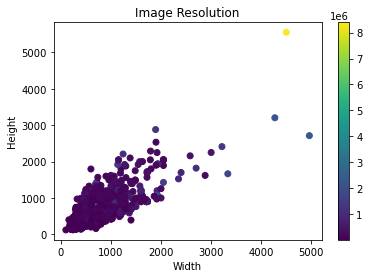

In [16]:
# Visualize Image Resolutions with Scatter plot
def scatter_plot_sizes():
    plt.scatter(df['width'], df['height'], c=df['size'], cmap='viridis')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Image Resolution')
    plt.colorbar()
    plt.show()
    
scatter_plot_sizes()

#### Selecting Images of Shape Under 2500 * 2500

In [17]:
# Selecting images with height and width less than 2500
selected_images = df[(df['width'] < 2500) & (df['height'] < 2500)]
selected_images

,image,size,width,height
0,image_1467.jpg,122310,728,728
1,image_6363.jpg,40790,430,241
2,image_3356.png,150774,500,567
3,image_4500.jpg,40977,720,720
4,image_3819.jpg,21254,225,316
...,...,...,...,...
6987,image_1255.jpg,107475,1024,768
6988,image_773.jpg,63966,625,439
6989,image_5568.jpg,72639,960,960
6990,image_1053.jpg,114875,700,466


#### Average Size for Resizing

In [18]:
# Select the Average Image Resolution
def get_avg_resolution(df):
    avg_width = df['width'].mean()
    avg_height = df['height'].mean()
    max_shape = (avg_width, avg_height)
    # round the shape to the nearest 100
    max_shape = (round(max_shape[0]), round(max_shape[1]))
    print("Average Image Resolution: ", max_shape)
    return max_shape
max_shape = get_avg_resolution(selected_images)
max_shape = (150,150)
print("Selected Image Resolution: ", max_shape)


Average Image Resolution:  (583, 543)
Selected Image Resolution:  (150, 150)


#### Resizing

In [19]:
# Resize the image to the max resolution
def resize_images(images):
    for image in images:
        img = Image.open(image)
        # check if mode is not RGB
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize(max_shape, Image.ANTIALIAS)
        img.save(image)

# resize_images(selected_images['image'].to_list())

#### Extrating Features by Canny Edge Detection Algorithm

In [20]:
# Extracting the Image Features using Cannied Edge Detection Algorithm
from skimage.feature import canny

def extract_canny_features(images):
    for image in images:
        img = Image.open(image)
        img = img.convert('L') # Convert to Grayscale
        img = np.array(img)
        edges = canny(img, sigma=3, low_threshold=10, high_threshold=50)
        # edges = edges.astype(np.uint8) * 255 
        save_img = Image.fromarray(edges)
        save_img.save(image)

# extract_canny_features(selected_images['image'].to_list())

#### Making all images to .jpg

In [21]:
# convert all to .jpg
def convert_to_jpg(images):
    for image in images:
        img = Image.open(image)
        image.replace('.png','.jpg')
        image.replace('.jpeg','.jpg')
        image.replace('.JPG','.jpg')
        image.replace('.JPEG','.jpg')
        image.replace('.PNG','.jpg')
        img.save(image)

# convert_to_jpg(selected_images['image'].to_list())

#### Selecting the Label Column

In [22]:
# Label Column 
label_path = label_xlsx_path
df_label = pd.read_excel(label_path)
df_label.head()
df_label.drop(columns=['Unnamed: 0'], inplace=True)

# select overall_sentiment column and replace 'positive' and 'negative' with int(1) and int(0)
df_label['overall_sentiment'] = df_label['overall_sentiment'].replace(['positive', 'negative'], [1, 0])
df_label['overall_sentiment'] = df_label['overall_sentiment'].replace(['very_positive', 'very_negative'], [1, 0])
df_label['overall_sentiment'] = df_label['overall_sentiment'].replace(['neutral'], [2])
df_label['overall_sentiment'] = df_label['overall_sentiment'].astype(int)

#### Occurances of Overall Sentiment

In [23]:
print(df_label['overall_sentiment'].value_counts())
num_positive = df_label['overall_sentiment'].value_counts()[1]

1    4160
2    2201
0     631
Name: overall_sentiment, dtype: int64


#### Deleting Rows of the Oversized Images and Replacing NaNof text_corrected to text

In [24]:
# delete images from folder that are not in selected_images
for image in images:
    if image not in selected_images['image'].to_list():
        os.remove(image)
images = os.listdir(path)

os.chdir(path)
images = os.listdir(os.getcwd())
print("Images in Folder: ", len(images))

df_label = df_label[df_label['image_name'].isin(selected_images['image'].to_list())]
print("Length of DF: ", len(df_label))

Images in Folder:  6981
Length of DF:  6981


#### Data Augmentation Images

In [25]:
# Data Augmentation

def augment_images(df_label):
    for i in images:
        img = Image.open(i)
        # if overall_sentiment is 2 then rotate the image
        if df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0] == 2:
            img_flip = img.transpose(Image.FLIP_LEFT_RIGHT)
            img_flip.save(i.replace('.jpg', '_flip.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_flip.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0],'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

        # if overall_sentiment is 0 then rotate the image
        if df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0] == 0:

            img_rotate = img.rotate(90)
            img_rotate.save(i.replace('.jpg', '_rotate_ninty.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_rotate_ninty.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0],'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

            img_rotate_180 = img.rotate(180)
            img_rotate_180.save(i.replace('.jpg', '_rotate_oneighty.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_rotate_oneighty.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

            img_flip_diagonal = img.transpose(Image.FLIP_TOP_BOTTOM)
            img_flip_diagonal = img_flip_diagonal.rotate(90)
            img_flip_diagonal.save(i.replace('.jpg', '_flip_diagonal.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_flip_diagonal.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

            img_flip_diagonal_180 = img.transpose(Image.FLIP_TOP_BOTTOM)
            img_flip_diagonal_180 = img_flip_diagonal_180.rotate(180)
            img_flip_diagonal_180.save(i.replace('.jpg', '_flip_diagonal_oneighty.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_flip_diagonal_oneighty.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

            img_flip_diagonal_270 = img.transpose(Image.FLIP_TOP_BOTTOM)
            img_flip_diagonal_270 = img_flip_diagonal_270.rotate(270)
            img_flip_diagonal_270.save(i.replace('.jpg', '_flip_diagonal_twoseventy.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_flip_diagonal_twoseventy.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

            img_flip_diagonal_270_180 = img.transpose(Image.FLIP_TOP_BOTTOM)
            img_flip_diagonal_270_180 = img_flip_diagonal_270_180.rotate(270)
            img_flip_diagonal_270_180 = img_flip_diagonal_270_180.rotate(180)
            img_flip_diagonal_270_180.save(i.replace('.jpg', '_flip_diagonal_twoseventy_oneighty.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_flip_diagonal_twoseventy_oneighty.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

            img_flip_diagonal_270_270 = img.transpose(Image.FLIP_TOP_BOTTOM)
            img_flip_diagonal_270_270 = img_flip_diagonal_270_270.rotate(270)
            img_flip_diagonal_270_270 = img_flip_diagonal_270_270.rotate(270)
            img_flip_diagonal_270_270.save(i.replace('.jpg', '_flip_diagonal_twoseventy_twoseventy.jpg'))
            df_label = df_label.append({'image_name': i.replace('.jpg', '_flip_diagonal_twoseventy_twoseventy.jpg') , 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

    return df_label

# df_label = augment_images(df_label)

In [26]:
# Check the Lenghs of Images and Labels
os.chdir(path)
images = os.listdir(os.getcwd())
print("Images in Folder: ", len(images))

print("Images in DF: ", len(df_label))

Images in Folder:  6981
Images in DF:  6981


In [27]:
# Create a new dataframe with the images in the images folder
def create_df_images(df_label):
    new_df = pd.DataFrame(columns=['image_name', 'text_ocr', 'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment'])
    for i in images:
        new_df = new_df.append({'image_name': i, 'text_ocr': df_label.loc[df_label['image_name'] == i, 'text_ocr'].values[0], 'text_corrected': df_label.loc[df_label['image_name'] == i, 'text_corrected'].values[0], 'humour': df_label.loc[df_label['image_name'] == i, 'humour'].values[0], 'sarcasm': df_label.loc[df_label['image_name'] == i, 'sarcasm'].values[0], 'offensive': df_label.loc[df_label['image_name'] == i, 'offensive'].values[0], 'motivational': df_label.loc[df_label['image_name'] == i, 'motivational'].values[0], 'overall_sentiment': df_label.loc[df_label['image_name'] == i, 'overall_sentiment'].values[0]}, ignore_index=True)

    return new_df

# new_df = create_df_images(df_label)
# df_label = new_df

In [28]:
df_label = pd.read_csv(augmented_labels_path)
# df_label

#### Number of Images after Data Augmentation

In [29]:
# After Data Augmentation and Shuffling
print(df_label['overall_sentiment'].value_counts())

os.chdir(path)
images = os.listdir(os.getcwd())
print("\nImages in Folder: ", len(images))

print("Images in DF: ", len(df_label))

1    4153
2    3793
0    3759
Name: overall_sentiment, dtype: int64

Images in Folder:  6981
Images in DF:  11705


#### Function that return the original name of the augmented images

In [30]:
def if_augmented_img_replace_name(img):
    if "flip" or "topdown" or "rotate_ninty" or "rotate_oneighty" or "flip_diagonal" or "flip_diagonal_oneighty" or "flip_diagonal_twoseventy" in img:
        img  = img.replace('_flip.jpg', '.jpg')
        img  = img.replace('_topdown.jpg', '.jpg')
        img  = img.replace('_rotate_ninty.jpg', '.jpg')
        img  = img.replace('_rotate_oneighty.jpg', '.jpg')
        img  = img.replace('_flip_diagonal.jpg', '.jpg')
        img  = img.replace('_flip_diagonal_oneighty.jpg', '.jpg')
        img  = img.replace('_flip_diagonal_twoseventy.jpg', '.jpg')
        img = img.replace('_flip_diagonal_twoseventy_oneighty.jpg', '.jpg')
        img = img.replace('_flip_diagonal_twoseventy_twoseventy.jpg', '.jpg')
        img = img.replace('_flip_diagonal_twoseventy_twoseventy_oneighty.jpg', '.jpg')
    return img

#### Get Image Features

In [31]:
# Get Image Features

def get_image_features(image_name):
    img = Image.open(image_name)
    img = np.array(img)
    img = img.flatten()
    label = df_label[df_label['image_name'] == image_name]['overall_sentiment'].values[0]
    # make them as a tensor and float for training the model
    img = torch.from_numpy(img).float()
    label = torch.from_numpy(np.array(label)).long()
    return img, label

x, l = get_image_features('image_8.jpg')
print(x, l)

tensor([ 0.,  0.,  0.,  ...,  2., 10.,  0.]) tensor(2)


### Text - Preprocessing

In [32]:
replace_NaN_with = ["CHALLENGE ACCEPTED! Friend: You can't honestly watch How I Met Your Mother again for like the 4th time.. Me:" ,"I'M GONNA BUILD SOME FANCY WALLS EVEN THOUGHIHAVE MILLIONS OF EXTRA DOLLARS IN GONNA MAKE THE MEXICANS PAY FORIT"
       ,"IF DONALD AND HILLARY ARE TOGETHER ON A BOAT IN THE MIDDLE OF THE OCEAN AND IT SINKS. WHO SURVIVES? AMERICA"
       ,"Bruh why this tub of margarine look like Donald Trump?"
       ,"2016 ELECTION TRUMPS HILIARY STILL'A BETTER LOVE STORY THAN TWILIGHT"]

# df_label[df_label['text_corrected'].isna()]
# df_label.loc[df_label['text_corrected'].isna(), 'text_corrected'] = replace_NaN_with

#### Loading Glove Model

In [33]:
# Loading Glove
def load_glove_model(glove_file):
    print("Loading Glove Model")
    f = open(glove_file, encoding="utf8")
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.", len(model), " words loaded!")
    return model

glove_model = load_glove_model(glove_file)

# Reference: https://www.kaggle.com/jamesmcguigan/word-embeddings-for-sentiment-analysis

Loading Glove Model
Done. 400000  words loaded!


In [34]:
x = glove_model['usman']
# print(x)
print(len(x))

100


#### Get Text Features and Padding them according to the highest Vector Length

In [35]:
# Get Text Features 
# def get_text_features(text):
#     text = text.lower()
#     tokens = word_tokenize(text)
#     features = np.zeros((1, 100))
#     for word in tokens:
#         try:
#             vec = glove_model[word]
#             # concatenate the vectors
#             features = np.vstack((features, vec))
#         except:
#             continue
#     features = features[1:] # remove the first row
#     features = features.flatten()
#     return features

# length = []
# for i in range(0, len(df_label)):
#     l = get_text_features(df_label.iloc[i]['text_corrected'])
#     # find the feature with maximum shape
#     length.append(len(l))
# print(max(length))

# max_len_feature_vector = max(length)
max_len_feature_vector = 20700

# Now Get Text Features for the given text and padd it with zeros to make it of same length as max_len_feature_vector
def get_text_features(image):
    # convert text type object <class 'pandas.core.series.Series'> to string
    # get text_corrected from df_label
    text = str(df_label[df_label['image_name'] == image]['text_corrected'].values[0])
    text = text.lower()
    tokens = word_tokenize(text)
    features = np.zeros((1, 100))
    for word in tokens:
        try:
            vec = glove_model[word]
            features = np.vstack((features, vec)) # add the vector to the features, without vstack it will add the vector to the last row
        except KeyError:
            continue
    # Flatten 
    features = features[1:] # remove the first row
    features = features.flatten()
    # Padding
    features = np.pad(features, (0, max_len_feature_vector - len(features)), 'constant')
    # make it a tensor and float for training the model
    features = torch.from_numpy(features).float()
    return features

t = get_text_features('image_8.jpg')
print(t)
print(len(t))

tensor([0.0868, 0.3431, 0.0153,  ..., 0.0000, 0.0000, 0.0000])
20700


### Create Datasets for Training, Testing, Validation

In [33]:
# Create the 80 percent images as train and 20 percent images as test
def create_data(images ,df_label):
    training_dataset = []
    # Get the Proportion for 75% training images 
    train_size = int(len(df_label) * 0.75)
    label_0_count = label_1_count = label_2_count = int(train_size / 3)
    print ("Label Count Should be: ", label_0_count, label_1_count, label_2_count)
    for i in range(0, len(df_label)):
        if label_0_count == 0 or label_1_count == 0 or label_2_count == 0:
            break
        label = df_label.iloc[i]['overall_sentiment']
        if label == 0:
            training_dataset.append(df_label.iloc[i]['image_name'])
            label_0_count -= 1
        elif label == 1:
            training_dataset.append(df_label.iloc[i]['image_name'])
            label_1_count -= 1
        elif label == 2:
            training_dataset.append(df_label.iloc[i]['image_name'])
            label_2_count -= 1
    # print ("Label Count: ", label_0_count, label_1_count, label_2_count)
    return training_dataset

training_dataset = create_data(images, df_label)

# Count the number of positive, negative and neutral images in the training set
l0, l1, l3 = 0, 0, 0
for i in range(0, len(training_dataset)):
    if df_label.iloc[i]['overall_sentiment'] == 0:
        l0 += 1
    elif df_label.iloc[i]['overall_sentiment'] == 1:
        l1 += 1
    elif df_label.iloc[i]['overall_sentiment'] == 2:
        l3 += 1
print ("Final Label Count in Training Dataset: ", l0, l1, l3)
print(len(training_dataset))

Label Count Should be:  2926 2926 2926
Final Label Count in Training Dataset:  2642 2926 2646
8214


In [34]:
# Create Test Dataset 
def create_test_data(images, df_label):
    test_dataset = []
    for i in range(0, len(df_label)):
        # Not more than 1000 images in the test dataset
        if len(test_dataset) > 1000:
            break
        if df_label.iloc[i]['image_name'] not in training_dataset:
            test_dataset.append(df_label.iloc[i]['image_name'])
    print(len(test_dataset))
    return test_dataset

# test_dataset = create_test_data(images, df_label)
# print(len(test_dataset))

## Multi Model - Neural Network 

#### Create Model and Architecture

In [5]:
class MultiModelNeuralNetwork(nn.Module):
    def __init__(self, 
    Net1_input, Net1_hidden1, Net1_hidden2,
    Net2_input, Net2_hidden1, Net2_hidden2,
    concat_hidden1, concat_hidden2, concat_hidden3, output):
        super(MultiModelNeuralNetwork, self).__init__()

        self.Image_NN = nn.Sequential(
            nn.Linear(Net1_input, Net1_hidden1),
            nn.ReLU(),
            nn.Linear(Net1_hidden1, Net1_hidden2),
        )
        
        self.Text_NN = nn.Sequential(
            nn.Linear(Net2_input, Net2_hidden1),
            nn.ReLU(),
            nn.Linear(Net2_hidden1, Net2_hidden2)
        )

        # Concatenate the two NN and perform a linear layer and a hidden layer then concat_hidden layer
        self.concatenate_NN = nn.Sequential(
            nn.Linear(Net1_hidden2 + Net2_hidden2, concat_hidden1),
            nn.Sigmoid(),
            nn.Linear(concat_hidden1, concat_hidden2),
            nn.Sigmoid(),
            nn.Linear(concat_hidden2, concat_hidden3),
            nn.Sigmoid(),
            nn.Linear(concat_hidden3, output)
        )

    def forward(self, image, text):
        image = self.Image_NN(image)
        text = self.Text_NN(text)
        # Concatenate the two NN
        concatenate = torch.cat((image, text))
        # Pass the concatenated NN to the concatenate_NN
        concat_hidden = self.concatenate_NN(concatenate)    
        return concat_hidden

# Hyperparameters
Net1_input = 150*150 # 400 * 400 = 160000
Net1_hidden1 = 100
Net1_hidden2 = 50
# Net1_hidden3 = 100
Net2_input = 20700 # 20700
Net2_hidden1 = 100
Net2_hidden2 = 50
# Net2_hidden3 = 80
concat_hidden1 = 80
concat_hidden2 = 40
concat_hidden3 = 15
# concat_hidden4 = 15
output = 3 # 3 classes

model = MultiModelNeuralNetwork(Net1_input, Net1_hidden1, Net1_hidden2,
 Net2_input, Net2_hidden1, Net2_hidden2,
 concat_hidden1, concat_hidden2, concat_hidden3, output)
print("Parameters: ", model.parameters)

Parameters:  <bound method Module.parameters of MultiModelNeuralNetwork(
  (Image_NN): Sequential(
    (0): Linear(in_features=22500, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
  )
  (Text_NN): Sequential(
    (0): Linear(in_features=20700, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
  )
  (concatenate_NN): Sequential(
    (0): Linear(in_features=100, out_features=80, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=80, out_features=40, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=40, out_features=15, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=15, out_features=3, bias=True)
  )
)>


#### Model Architecture - Visualization 

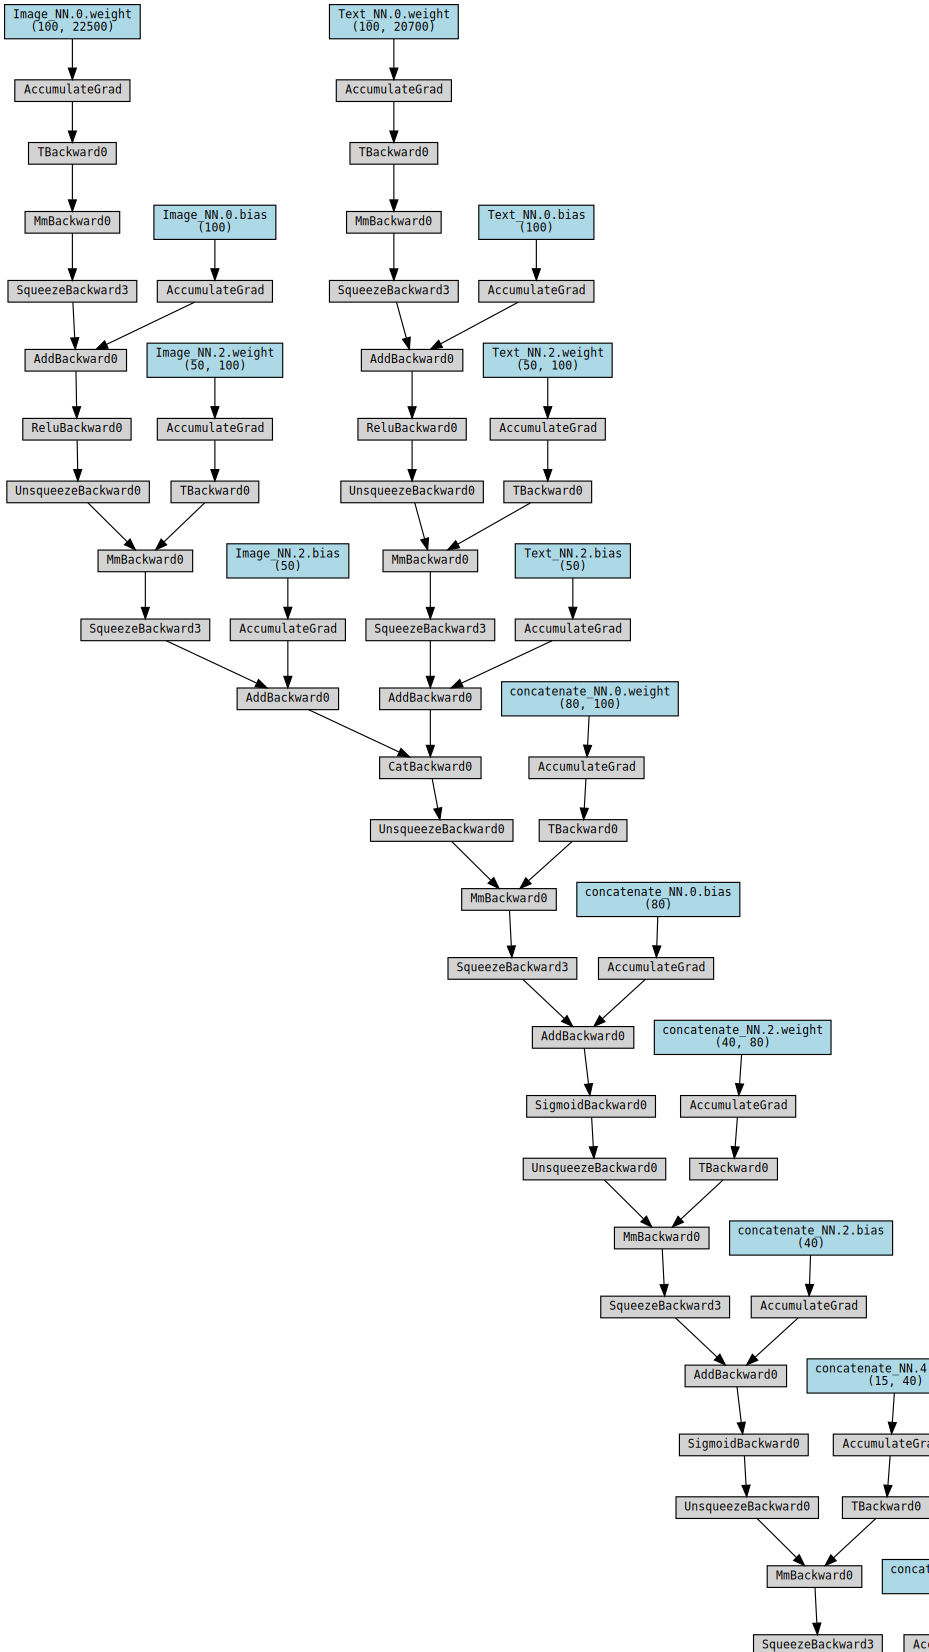


(evince:360050): Gtk-WARNING **: 10:49:38.147: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.

(evince:360050): GLib-GObject-WARNING **: 10:49:43.848: invalid cast from 'GtkFileChooserNative' to 'GtkWidget'


In [36]:
from torchviz import make_dot
img_f, l = get_image_features('image_8.jpg')
# print(img_f, img_f.shape)
text_f = get_text_features('image_8.jpg')
# print(text_f, text_f.shape)

# Generate a Visual Architecture of the Model using Pytorchviz - make_dot
make_dot(model(img_f, text_f), params=dict(model.named_parameters())).render('model1_architecture.gv', view=True)
make_dot(model(img_f, text_f), params=dict(model.named_parameters()))

In [44]:
# import accuracy_score and F1 score
from sklearn.metrics import accuracy_score, f1_score

#### Model - Training

In [45]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

epochs = 20

def train_model(model, training_dataset, df_label, epochs):
    loss_list = []
    actual_label = []
    y_preds = []
    accuracy_list = []
    f1_list = []
    lr = 1e-7

    for epoch in range(epochs):
        for img in training_dataset:
            # Image and Label
            img = if_augmented_img_replace_name(img)
            img_f, label = get_image_features(img)

            # Text
            text = get_text_features(img)

            # Forward pass
            outputs = model(img_f, text)

            # Calculate loss
            loss = criterion(outputs, label)
            loss_list.append(loss.item())
            actual_label.append(label.item())
            y_preds.append(torch.max(outputs, 0)[1].item())

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # print("Epoch: ", epoch+1, " | Image: ", image_count+1, " | Loss: ", loss.item(), " | Pred: ", torch.max(outputs, 0)[1].item()) 

        # Calculate Accuracy and F1 Score
        acc = (accuracy_score(actual_label, y_preds)*100)
        f1_sc = (f1_score(actual_label, y_preds, average='macro')*100)
        accuracy_list.append(acc)
        f1_list.append(f1_sc)
        print("Epoch: {}/{}, | F1 Score: {}, Accuracy: {}".format(epoch+1, epochs, f1_sc, acc))

    return loss_list, accuracy_list, f1_list

loss_list, acc, f1 = train_model(model, training_dataset, df_label, epochs)

print("\n\n")
print("Overall Accuracy: ", np.mean(acc))
print("Overall F1 Score: ", np.mean(f1))
print("Overall Loss: ", np.mean(loss_list))
print("\n\n")

Epoch: 1/20, | F1 Score: 34.927940680618015, Accuracy: 41.66057949841734
Epoch: 2/20, | F1 Score: 42.02289435613422, Accuracy: 47.66252739225712
Epoch: 3/20, | F1 Score: 48.044349437022156, Accuracy: 52.958363769174575
Epoch: 4/20, | F1 Score: 50.88925409330801, Accuracy: 55.83759435110787
Epoch: 5/20, | F1 Score: 52.77867194489039, Accuracy: 57.93766739712686
Epoch: 6/20, | F1 Score: 54.05892293043658, Accuracy: 59.37829721613505
Epoch: 7/20, | F1 Score: 54.95464675418652, Accuracy: 60.41775366099691
Epoch: 8/20, | F1 Score: 55.66293941746695, Accuracy: 61.21865108351595
Epoch: 9/20, | F1 Score: 56.20553987530591, Accuracy: 61.84968752536321
Epoch: 10/20, | F1 Score: 56.623827033802165, Accuracy: 62.354516678841
Epoch: 11/20, | F1 Score: 56.97421634733401, Accuracy: 62.76091816632358
Epoch: 12/20, | F1 Score: 57.29643197042176, Accuracy: 63.11784757730704
Epoch: 13/20, | F1 Score: 57.610375812137114, Accuracy: 63.42642018317694
Epoch: 14/20, | F1 Score: 57.87676984756076, Accuracy: 63

#### Save the Model

In [46]:
# Save the Model to path specified 
# torch.save(model.state_dict(), model_path)

In [37]:
# Load the Model from path specified
MMNN_model = MultiModelNeuralNetwork(Net1_input, Net1_hidden1, Net1_hidden2, Net2_input, Net2_hidden1, Net2_hidden2, concat_hidden1, concat_hidden2, concat_hidden3, output)
MMNN_model.load_state_dict(torch.load(model_path))
MMNN_model.eval()

MultiModelNeuralNetwork(
  (Image_NN): Sequential(
    (0): Linear(in_features=22500, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
  )
  (Text_NN): Sequential(
    (0): Linear(in_features=20700, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
  )
  (concatenate_NN): Sequential(
    (0): Linear(in_features=100, out_features=80, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=80, out_features=40, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=40, out_features=15, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=15, out_features=3, bias=True)
  )
)

#### Test Model

In [49]:
# Test the Model on the Test Dataset
test_dataset = create_test_data(images, df_label)
for image in test_dataset:
    image = if_augmented_img_replace_name(image)
    img_f, l = get_image_features(image)
    text_f = get_text_features(image)
    outputs = MMNN_model(img_f, text_f)
    print("Image: ", image, " | Pred: ", torch.max(outputs, 0)[1].item(), " | Actual: ", l)

1001
Image:  image_6208.jpg  | Pred:  0  | Actual:  tensor(0)
Image:  image_63.png  | Pred:  1  | Actual:  tensor(1)
Image:  image_555.jpg  | Pred:  0  | Actual:  tensor(0)
Image:  image_2480.jpg  | Pred:  2  | Actual:  tensor(2)
Image:  image_6237.jpg  | Pred:  1  | Actual:  tensor(1)
Image:  image_966.jpg  | Pred:  0  | Actual:  tensor(0)
Image:  image_6698.png  | Pred:  1  | Actual:  tensor(1)
Image:  image_2429.png  | Pred:  1  | Actual:  tensor(1)
Image:  image_1439.jpg  | Pred:  1  | Actual:  tensor(1)
Image:  image_4945.jpg  | Pred:  0  | Actual:  tensor(0)
Image:  image_160.jpg  | Pred:  0  | Actual:  tensor(0)
Image:  image_6611.jpg  | Pred:  1  | Actual:  tensor(1)
Image:  image_3077.jpg  | Pred:  2  | Actual:  tensor(2)
Image:  image_6351.png  | Pred:  1  | Actual:  tensor(1)
Image:  image_2011.png  | Pred:  1  | Actual:  tensor(1)
Image:  image_4156.jpg  | Pred:  2  | Actual:  tensor(2)
Image:  image_4225.png  | Pred:  1  | Actual:  tensor(1)
Image:  image_2481.jpg  | Pred: